## TRABALHO T_NN_DL_02

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

Keras:2.12.0


In [ ]:
cifar100 = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

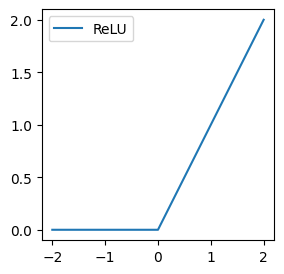

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(start = -2, stop = 2, num = 41)

fig = plt.figure(figsize=(3, 3))
ax = plt.plot(x, relu(x), label='ReLU')

plt.legend(loc='upper left')

plt.show()

In [ ]:
n_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
print(n_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               307500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 338,610
Trainable params: 338,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print(n_model.layers)

hidden1 = n_model.layers[1]  # first hidden layer

print(f'\nFirst hidden layer name:{hidden1.name}')

[<keras.layers.reshaping.flatten.Flatten object at 0x7f2a7d16fbb0>, <keras.layers.core.dense.Dense object at 0x7f2a7d16e6b0>, <keras.layers.core.dense.Dense object at 0x7f2a7d16dc60>, <keras.layers.core.dense.Dense object at 0x7f2a7c072380>]

First hidden layer name:dense_3


In [ ]:
weights, biases = hidden1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

Layer weights shape:
(3072, 300)

Layer weights:
[[ 0.04025271 -0.02114122 -0.02147058 ... -0.01983696  0.02871674
   0.03995361]
 [-0.04075177 -0.00303267  0.02056413 ...  0.0072559  -0.0026206
   0.00882037]
 [-0.00749259 -0.00824094  0.03212538 ...  0.02421384 -0.01243404
   0.00387529]
 ...
 [ 0.0034067   0.00527861  0.03125548 ...  0.0215385   0.02408484
  -0.00994798]
 [-0.01013119  0.02972632 -0.0255278  ... -0.04198916 -0.00583696
  -0.01001738]
 [ 0.00089075  0.0201303  -0.03283177 ... -0.03319883  0.02292572
   0.03503402]]

Layer biases shape:
(300,)

Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

Dataset shape:(50000, 32, 32, 3)
First instance shape:(32, 32, 3)

First instance:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


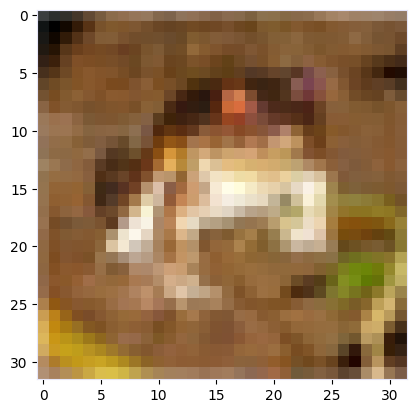

In [ ]:
fig = plt.imshow(X_train_full[0], cmap=plt.cm.gray)
plt.show()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print(y_train_full[2])
print(f'Class name of first instance: {class_names[y_train_full[0].item()]}')

[9]
Class name of first instance: frog


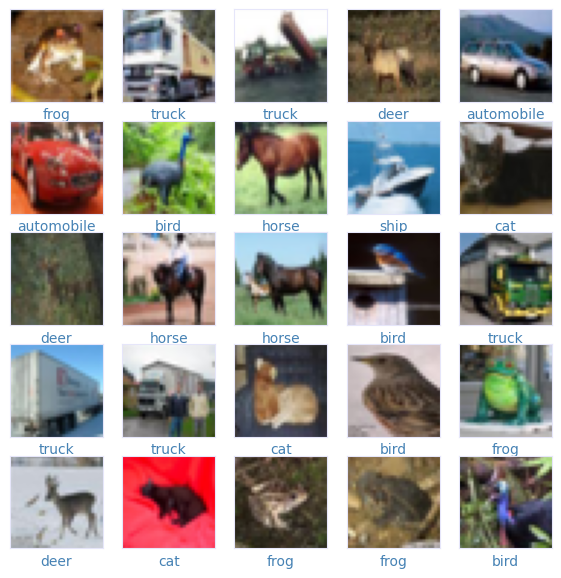

In [ ]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(25):  # First 25 instances
    plt.subplot(5, 5, i + 1)
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i].item()], color='steelblue')

plt.show()

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

n_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['sparse_categorical_accuracy'])

In [ ]:
history = n_model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1407/1407 [==============================] - 22s 15ms/step - loss: 1.7515 - sparse_categorical_accuracy: 0.3716 - val_loss: 1.6563 - val_sparse_categorical_accuracy: 0.4122
Epoch 2/30
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6071 - sparse_categorical_accuracy: 0.4186 - val_loss: 1.6090 - val_sparse_categorical_accuracy: 0.4260
Epoch 3/30
1407/1407 [==============================] - 22s 15ms/step - loss: 1.5545 - sparse_categorical_accuracy: 0.4399 - val_loss: 1.6514 - val_sparse_categorical_accuracy: 0.4140
Epoch 4/30
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5164 - sparse_categorical_accuracy: 0.4580 - val_loss: 1.5502 - val_sparse_categorical_accuracy: 0.4464
Epoch 5/30
1407/1407 [==============================] - 22s 15ms/step - loss: 1.4799 - sparse_categorical_accuracy: 0.4721 - val_loss: 1.4866 - val_sparse_categorical_accuracy: 0.4730
Epoch 6/30
1407/1407 [==============================] - 21s 15ms/step - loss: 1.

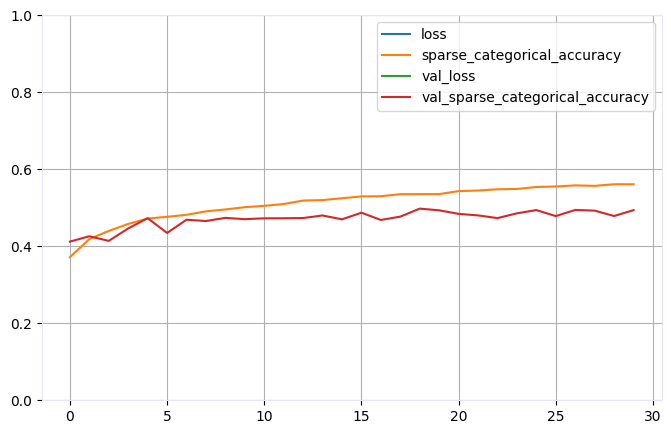

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

In [ ]:
n_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 441.1623 - accuracy: 0.3726


[441.1622619628906, 0.3725999891757965]